##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

In [ ]:
voters.head(10)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
5,Arizona,2020,Feb,50853
6,Arizona,2020,Mar,31872
7,Arizona,2020,Apr,10249
8,California,2016,Jan,87574
9,California,2016,Feb,103377


##Introduction (10 points)
You've been hired to work with a government organization interested information about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

**The purpose of my project is to provide insight into voter registration trends as impacted by the pandemic (2020) vs. the same trends in a standard control year (2016). My goal is to be able to better understand the impact of the COVID-19 pandemic on American elections, and it is important for somebody to read this notebook because I believe my work here could help future electoral officials to anticipate and prepare for the impacts of disasters like pandemics.**

In additon, state your two research questions

* Question 1: **How did voter registration change from 2016 to 2020 across the nation?**
* Question 2: **Does the pace of early voter registration in Virginia differ significantly from 2016 to 2020?**



---



## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
"""
The variable names for this notebook are "Jurisdiction", "Year", "Month", and "New registered voters".
Jurisdiction refers to the state, while the rest of the variable names are quite self explanatory.
"""

voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [ ]:
"""
Here, I used the .isnull() method to detect any N/A values, but I did this with .values.any() so it will give me just one True/False result.
In this case it is false, so there is no N/A value in the dataframe.
"""

voters.isnull().values.any()

False

Check your data types. (1 point)

In [ ]:
"""
.info() pulls up a list of columns in the dataframe, along with the count of non-null inputs and the datatype of each column.
"""

voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
"""
.rename() lets me put a dictionary in under the "columns" argument and rename whatever column I want.
"""

voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

Potential limitations to this data come in two main forms, in my opinion:
    
**A) A lack of scope regarding states** -- The data in this dataset only examines voter registration data in twelve states. While this could be enough to draw some conclusions about the rest of the country, to develop a clearer picture more information from more states is needed.  
  
**B) A lack of scope regarding time period** -- This voter registration data only has numbers from the beginning of 2016 and the beginning of 2020. This allows us to draw a contrast between these two time periods, but doesn't tell us everything we'd like to know about changes in voter registration numbers over time.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
"""
For this problem, I used .loc[] to find the row where the registered_voters value is equal to the maximum for that column.
In this case, it is the California data for February of 2020, with 238,281 added voters.
"""

voters.loc[voters["registered_voters"] == voters["registered_voters"].max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
"""
.mean() allows me to find the average value of a column by summing up all the values and dividing by the number of rows.
Here, the mean is ~48,223 new voters per month.
"""

voters["registered_voters"].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
"""
My new dataframe high_voters consists of some of the rows from voters, but only those where the registered_voters value is greater than the average for that column.
"""

high_voters = voters.loc[voters["registered_voters"] > voters["registered_voters"].mean()]
high_voters

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


In [ ]:
"""
Normally, len() can help us measure the length of a string, list, or dictionary, but here we can use it to find the length of a dataframe.
The length of a dataframe is just how many rows it contains, and in the case of high_voters, it is 36 (aka 36 times where voter registration is above average).
"""

len(high_voters)

36

How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
"""
.value_counts() lets me see how many times a certain value appears in my dataframe, and by applying it to high_voters["NAME"] we can see how many times each state appears.
Since high_values is just a dataframe of above average voter registration months by state, this shows me how many times each state was above the average.
"""

high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
"""
This question was more in depth, so I started by creating a new dataframe avg_vr with only the "NAME" and "registered_voters" columns from voters.
Then, I used .groupby to change avg_vr into a dataframe purely comparing the NAME values (.groupby("NAME")) with their respective registered_voters averages (.mean("registered_voters"))
Lastly, I used .sort_values to reorder my dataframe by the value of the registered_voters column, and ascending=False to make it sort from highest to lowest.
avg_vr.head(3) shows the top 3 states, which are California, Texas, and Florida.
"""

avg_vr = voters[["NAME", "registered_voters"]]
avg_vr = avg_vr.groupby("NAME").mean("registered_voters")
avg_vr = avg_vr.sort_values("registered_voters", ascending=False)

avg_vr.head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [ ]:
total_vr = voters[["NAME", "registered_voters"]]
total_vr = total_vr.groupby("NAME").sum("registered_voters")
total_vr = total_vr.reset_index()
total_vr = total_vr.sort_values("registered_voters", ascending=False)

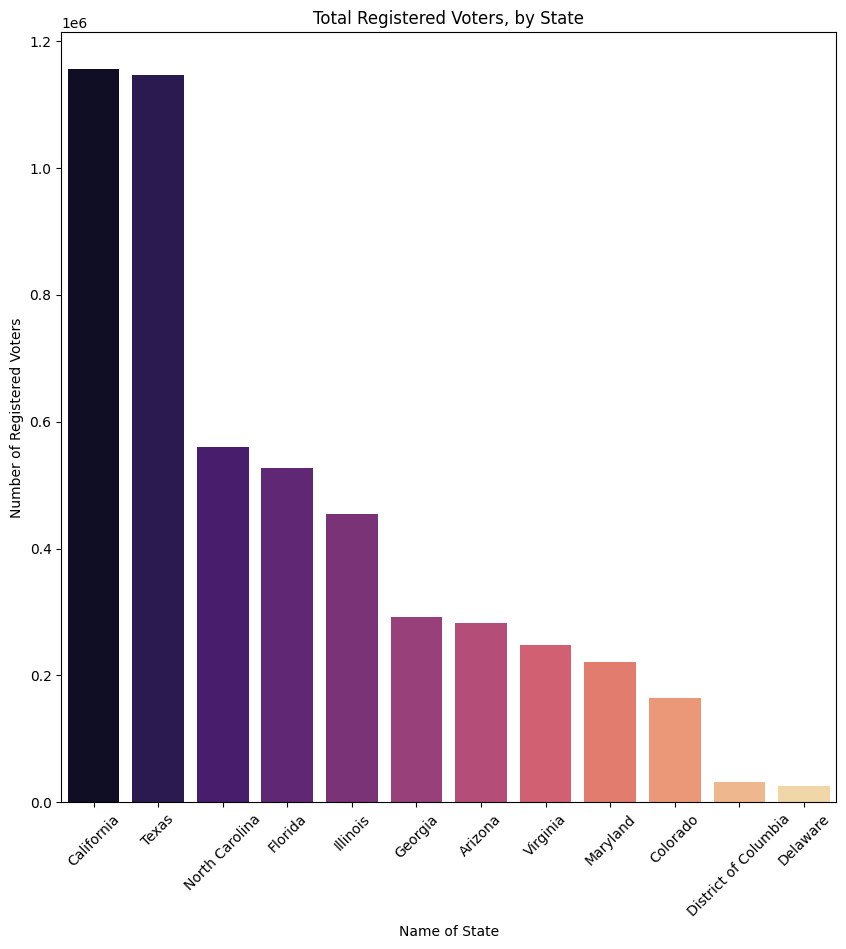

In [ ]:
"""
The trend I am seeing on this graph is that the amount of registered voters in a state is roughly analogous to the population of that state.
California and Texas are the #1 and #2 most populated states in the country, and the amount of registered voters they have towers over the other states.
By contrast, Delaware is one of the least populated states, and DC has even less people than it, and they are far and away the states with the least registered voters.
"""

fig = plt.figure(1,figsize=(10,10))
ax = fig.add_subplot()

sns.barplot(total_vr, ax=ax, x="NAME", y="registered_voters", palette="magma", hue="NAME")
plt.title("Total Registered Voters, by State")
plt.xlabel("Name of State")
plt.ylabel("Number of Registered Voters")
plt.xticks(rotation=45)
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

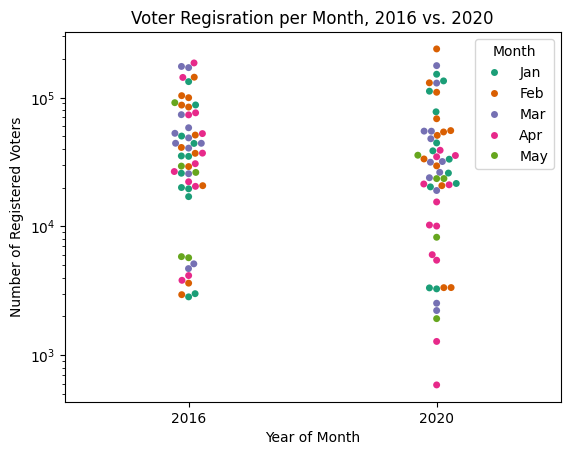

In [ ]:
"""
One trend that I pretty clearly noticed in this data was the difference in spread of the data in 2016 vs. 2020.
In 2016, the data tends to be mostly clustered (as illustrated more clearly with the log yscale) between 10^4 and 10^5 registered voters per month, with a small cluster just below it.
However, in 2020, this clustering phenomenon is much less apparent. While there is still somewhat of a cluster in a similar region to the 2016 data, there are far more low outliers.
I believe this may partially contribute to the overall drop in registration we see in 2020 early voter registration data vs. the corresponding numbers from 2016.
"""

sns.swarmplot(voters, x="Year", y="registered_voters", palette="Dark2", hue="Month")
plt.title("Voter Regisration per Month, 2016 vs. 2020")
plt.xlabel("Year of Month")
plt.ylabel("Number of Registered Voters")
plt.legend(title = "Month")
plt.yscale("log") # I decided to make the scale of the y-axis logarithmic to more clearly visualize any trends in the data. Using a linear scale makes it alot harder to visualize.
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

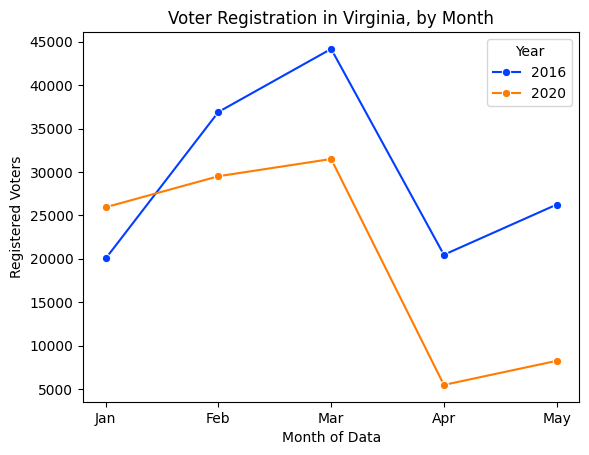

In [ ]:
"""
The graph shows us that in Virginia, voter registration tends to follow the same general pattern in 2016 and 2020: steadily climbing during January - March, but dropping off majorly in April and May.
However, the magnitude of these trends differs significantly between years: voter registration in February-May of 2016 is significantly higher than corresponding months in 2020.
It makes sense to me that this major lull in registration started in February rather than January 2020, because that is when COVID achieved epidemic status in the United States.
"""

sns.lineplot(voters.loc[voters['NAME'] == "Virginia"], x="Month", y = "registered_voters", hue="Year", palette="bright", marker="o")
plt.xlabel("Month of Data")
plt.ylabel("Registered Voters")
plt.title("Voter Registration in Virginia, by Month")
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
"""
Note: I already did this above, but I'll do it again for the sake of this question.
"""

avg_vr2 = voters[["NAME", "registered_voters"]]
avg_vr2 = avg_vr2.groupby("NAME").mean("registered_voters")
avg_vr2 = avg_vr2.sort_values("registered_voters", ascending=False)

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
merged = bbox.merge(avg_vr2, on="NAME", how="inner")
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   STATEFP            12 non-null     object  
 1   STATENS            12 non-null     object  
 2   AFFGEOID           12 non-null     object  
 3   GEOID              12 non-null     object  
 4   STUSPS             12 non-null     object  
 5   NAME               12 non-null     object  
 6   LSAD               12 non-null     object  
 7   ALAND              12 non-null     int64   
 8   AWATER             12 non-null     int64   
 9   geometry           12 non-null     geometry
 10  registered_voters  12 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(7)
memory usage: 1.2+ KB


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

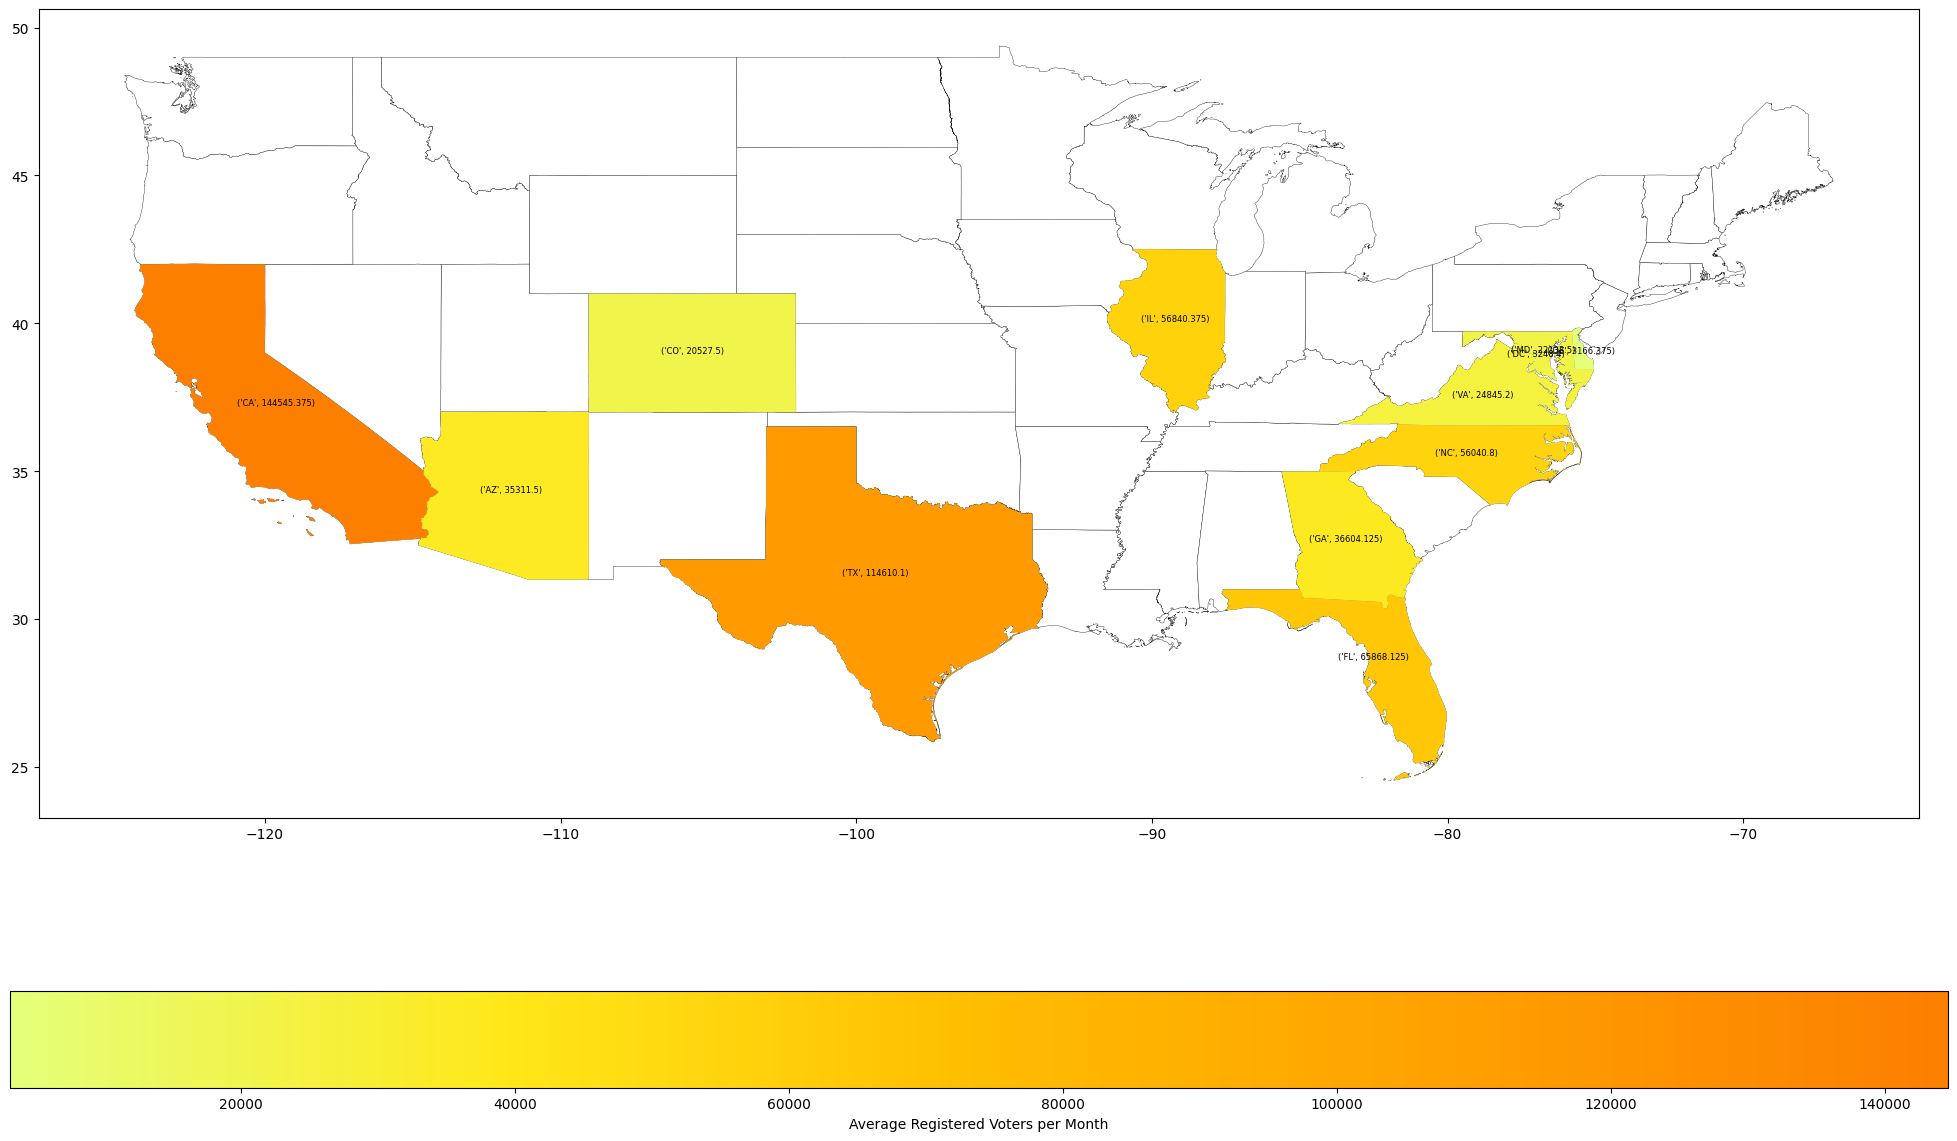

In [ ]:
fig = plt.figure(1,figsize=(25,15))
ax = fig.add_subplot()
usmap = bbox.plot(ax=ax, linewidth=0.25, edgecolor="black", color="white")
merged.apply(lambda x: ax.annotate(text=(x.STUSPS, x.registered_voters), # note: i actually just forgot how to print the registered_voters on a new line DESPITE the fact we learned it in class. please accept the tuple >-<
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),ha="center",fontsize=6),axis=1)
merged.plot(column="registered_voters",ax=usmap, legend=True,cmap="Wistia",
            legend_kwds={"label": "Average Registered Voters per Month",
            "orientation": "horizontal"})

plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


*   **Insights**: Thanks to my notebook and the graphs I was able to create with the given data, I've been able to answer both of my research questions and form a greater understanding of COVID's impact on voter registration. Nationally, we see similar high points of voter registration in 2016 and 2020, but a major skewing of the data towards the low end of the spectrum (especially in April and May) for the 2020 data in particular. Similarly, when zooming in on state trends in Virginia, we can see this stagnation and then plummeting in registration numbers in real time on the graph.

*   **Suggestions**: Suggestions that I would offer my client would mainly be in the realm of mitigating the problem that was made evident by this notebook. COVID, like any other natural disaster, had a major depressing effect on registration numbers, but government policy regarding voter registration has the opportunity to prevent this from happening. Measures to mitigate this and register more voters could include extended voter registration periods (including same-day registration), automatic voter registration, and avoiding unneccessary purges of voter roles so people don't have to re-register.

*   **Next Steps**: One step that I would take if I were to continue working on this project would be to collect more data. While the dataset provided here is useful, its limited scope, both in terms of the states covered and the years covered, prevents me from drawing stronger conclusions. Therefore, I would like to see both voter registration data from more states beyond the 13 here AND data from previous election years, like 2012 and 2008.


##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

https://github.com/ryandesnick/325-Midterm

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

## *Ryan Desnick*